In [45]:
"""
Magic commands
"""
%matplotlib inline
%load_ext autoreload
%autoreload 2

"""
Python standard packages
"""
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

"""
packages for dataload and simulation
"""
import ffn # data access
from arch import arch_model  # simulation
from arch.univariate import SkewStudent, GARCH, EGARCH, ARX
"""
Own packages
"""
sys.path.insert(0, "C:\\code\\speciale\\") # vesl path
sys.path.insert(0, "C:\\Users\\lucas\\OneDrive\\Skrivebord\\repo\\speciale\\") # ljb path

import codelib  # used for extending pandas

"""
ignore warnings
"""
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load and manipulate data

In [3]:
prices = ffn.get('aapl,msft, fing-b.st', start = '2018-01-01')
returns = prices.to_returns().dropna()
log_returns = prices.to_log_returns().dropna()
cum_returns = prices.rebase()

<AxesSubplot:xlabel='Date'>

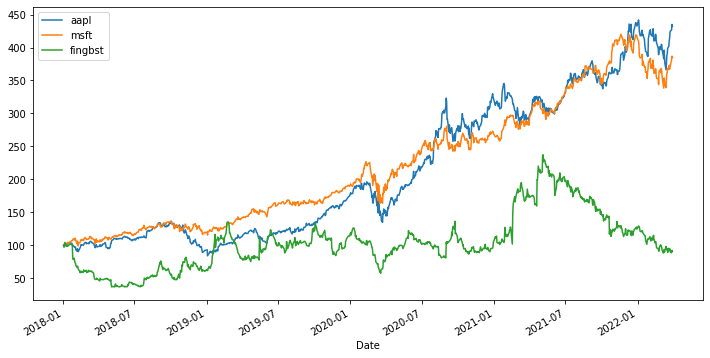

In [6]:
cum_returns.plot(figsize = (12, 6))

## Modelling and simulation

In [18]:
np.random.seed(0)
print(np.random.normal(size = 10))

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ]


Iteration:      1,   Func. Count:     13,   Neg. LLF: 44332.07807261346
Iteration:      2,   Func. Count:     29,   Neg. LLF: 32555.748580192438
Iteration:      3,   Func. Count:     45,   Neg. LLF: 41116.63767706185
Iteration:      4,   Func. Count:     61,   Neg. LLF: 10295.738911588869
Iteration:      5,   Func. Count:     76,   Neg. LLF: 100276.93463353574
Iteration:      6,   Func. Count:     91,   Neg. LLF: 24787.131159500816
Iteration:      7,   Func. Count:    105,   Neg. LLF: 11123.586196633707
Iteration:      8,   Func. Count:    120,   Neg. LLF: 28605.404686311365
Iteration:      9,   Func. Count:    135,   Neg. LLF: 53913.24370756011
Iteration:     10,   Func. Count:    149,   Neg. LLF: 16076.126136353885
Iteration:     11,   Func. Count:    164,   Neg. LLF: 3025.210722789726
Iteration:     12,   Func. Count:    177,   Neg. LLF: 2066.9970377305312
Iteration:     13,   Func. Count:    190,   Neg. LLF: 2066.011830495733
Iteration:     14,   Func. Count:    202,   Neg. LLF: 20

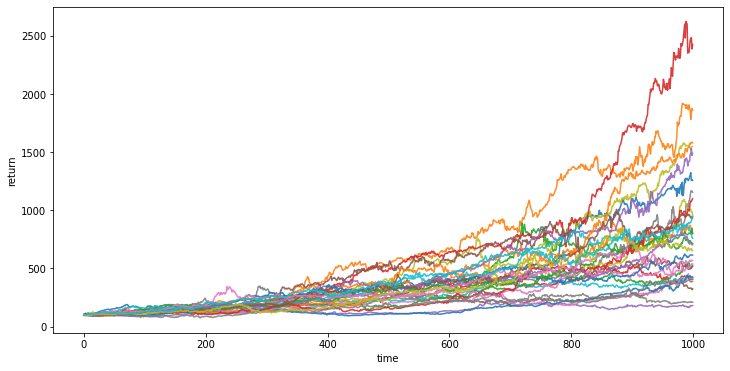

In [51]:
# FIT MODEL
rs = np.random.RandomState([0])

n_sims = 30
stock = 'aapl'
n_time_points = 1000

# Model specification
dist = SkewStudent(random_state = rs)
vol = EGARCH()
lag = [1, 2, 3, 4, 5]

# Model calibration
am = ARX(returns[stock] * 100, lags = lag, volatility = vol, distribution = dist)
am_fit = am.fit()
#am = arch_model(returns[stock] * 100, mean = "AR", vol = "garch", dist= skew_t) # fit garch model


# Model Simulation
fig, ax = plt.subplots(figsize = (12, 6))
ax.set(xlabel = "time", ylabel = "return")


for _ in range(n_sims):
    simulation = am.simulate(params = am_fit.params, nobs = n_time_points) / 100
    sim_prices = simulation.data.to_price_index()
    
    ax.plot(sim_prices, alpha = 30)


## create features

In [80]:
df_test = pd.DataFrame({"price":sim_prices})

In [93]:
df_test.create_features()

,price,ma_5,ma_50
0,101.614024,NaN,NaN
1,101.402373,NaN,NaN
2,100.082214,NaN,NaN
3,97.798550,NaN,NaN
4,98.563107,99.892054,NaN
...,...,...,...
995,142.042971,138.530570,132.369102
996,140.886539,139.105876,132.894457
997,139.719133,139.065386,133.345430
998,143.003547,140.329717,133.836271
